In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1 Load and clean data

In [279]:
# load answer data
# deleted line 801 in both files because it caused an error (had no score -> not usable for training)
column_names = ['Text String 1', 'Text String 2', 'Metadata 1', 'Metadata 2']
df = pd.read_csv('sts2016-english-with-gs-v1.0/STS2016.input.answer-answer.txt', sep='\t', header=None, names=column_names)
# load gs data
data = []
with open('sts2016-english-with-gs-v1.0/STS2016.gs.answer-answer.txt', 'r') as file:
    for line in file:
        # If the line is empty or just contains a newline character, add NaN
        if line.strip() == '':
            data.append([np.nan])
        else:
            # Otherwise, add the value to the data list
            data.append([line.strip()])
            
gs = pd.DataFrame(data, columns=['score'])

In [280]:
df.info()
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text String 1  1571 non-null   object
 1   Text String 2  1571 non-null   object
 2   Metadata 1     1571 non-null   object
 3   Metadata 2     1571 non-null   object
dtypes: object(4)
memory usage: 49.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   254 non-null    object
dtypes: object(1)
memory usage: 12.4+ KB


In [281]:
# merge dataframes
df = pd.concat([df, gs], axis=1) # concat hier, weil wir keine gemeinsame Spalte haben aber die Reihenfolge gleich ist
df

,Text String 1,Text String 2,Metadata 1,Metadata 2,score
0,Tasting it is the only reliable way.,The way you have it is fine.,StackExchange Network: http://cooking.stackexc...,StackExchange Network: http://writers.stackexc...,NaN
1,I think it probably depends on your money.,It depends on your country.,StackExchange Network: http://workplace.stacke...,StackExchange Network: http://travel.stackexch...,NaN
2,You need to read a lot to know what you like a...,You don't have to know.,StackExchange Network: http://writers.stackexc...,StackExchange Network: http://academia.stackex...,NaN
3,"Obviously, the best book for you depends a lot...",The answer will depend of course on what you'r...,StackExchange Network: http://travel.stackexch...,StackExchange Network: http://travel.stackexch...,NaN
4,I've had this same problem.,I had the same problem as you.,StackExchange Network: http://diy.stackexchang...,StackExchange Network: http://cooking.stackexc...,NaN
...,...,...,...,...,...
1566,You are on the right path.,You are right about the overtaking rules.,StackExchange Network: http://money.stackexcha...,StackExchange Network: http://travel.stackexch...,NaN
1567,This is a terrible idea.,This is a bad idea.,StackExchange Network: http://fitness.stackexc...,StackExchange Network: http://cooking.stackexc...,5
1568,I have the same thing.,I have had the same issue last couple of years.,StackExchange Network: http://diy.stackexchang...,StackExchange Network: http://pets.stackexchan...,NaN
1569,I don't think it makes any tremendous difference.,I don't think that there's any.,StackExchange Network: http://cooking.stackexc...,StackExchange Network: http://academia.stackex...,NaN


In [282]:
# clean data
# 1 convert score to float
df['score'] = pd.to_numeric(df['score'], errors='coerce') # coerce -> if error, set to NaN

# this is the pattern we want to extract
pattern = r'^(.*): (\bhttps?://\S+)'

# apply regex to metadata1 and metadata2 and store it in source_1 source_1_url source_2 source_2_url
df['source_1_url'] = df['Metadata 1'].str.extract(pattern)[1]
df['source_2_url'] = df['Metadata 2'].str.extract(pattern)[1]

# rename all columns to use snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = df.columns.str.strip(' ')

In [283]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text_string_1  1571 non-null   object 
 1   text_string_2  1571 non-null   object 
 2   metadata_1     1571 non-null   object 
 3   metadata_2     1571 non-null   object 
 4   score          254 non-null    float64
 5   source_1_url   1571 non-null   object 
 6   source_2_url   1571 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.0+ KB


,text_string_1,text_string_2,metadata_1,metadata_2,score,source_1_url,source_2_url
0,Tasting it is the only reliable way.,The way you have it is fine.,StackExchange Network: http://cooking.stackexc...,StackExchange Network: http://writers.stackexc...,NaN,http://cooking.stackexchange.com/questions/5611,http://writers.stackexchange.com/questions/11017
1,I think it probably depends on your money.,It depends on your country.,StackExchange Network: http://workplace.stacke...,StackExchange Network: http://travel.stackexch...,NaN,http://workplace.stackexchange.com/questions/1755,http://travel.stackexchange.com/questions/45030
2,You need to read a lot to know what you like a...,You don't have to know.,StackExchange Network: http://writers.stackexc...,StackExchange Network: http://academia.stackex...,NaN,http://writers.stackexchange.com/questions/12166,http://academia.stackexchange.com/questions/26241
3,"Obviously, the best book for you depends a lot...",The answer will depend of course on what you'r...,StackExchange Network: http://travel.stackexch...,StackExchange Network: http://travel.stackexch...,NaN,http://travel.stackexchange.com/questions/4582,http://travel.stackexchange.com/questions/23436
4,I've had this same problem.,I had the same problem as you.,StackExchange Network: http://diy.stackexchang...,StackExchange Network: http://cooking.stackexc...,NaN,http://diy.stackexchange.com/questions/2138,http://cooking.stackexchange.com/questions/12500


In [284]:
def get_topic(text):
    topic_match = re.search(r"http://([\w.-]+)\.stackexchange", text)
    if topic_match:
        topic = topic_match.group(1)
    else:
        topic = np.nan
        
    return topic

In [285]:
df['topic_1'] = df['source_1_url'].apply(get_topic)
df['topic_2'] = df['source_2_url'].apply(get_topic)
df

,text_string_1,text_string_2,metadata_1,metadata_2,score,source_1_url,source_2_url,topic_1,topic_2
0,Tasting it is the only reliable way.,The way you have it is fine.,StackExchange Network: http://cooking.stackexc...,StackExchange Network: http://writers.stackexc...,NaN,http://cooking.stackexchange.com/questions/5611,http://writers.stackexchange.com/questions/11017,cooking,writers
1,I think it probably depends on your money.,It depends on your country.,StackExchange Network: http://workplace.stacke...,StackExchange Network: http://travel.stackexch...,NaN,http://workplace.stackexchange.com/questions/1755,http://travel.stackexchange.com/questions/45030,workplace,travel
2,You need to read a lot to know what you like a...,You don't have to know.,StackExchange Network: http://writers.stackexc...,StackExchange Network: http://academia.stackex...,NaN,http://writers.stackexchange.com/questions/12166,http://academia.stackexchange.com/questions/26241,writers,academia
3,"Obviously, the best book for you depends a lot...",The answer will depend of course on what you'r...,StackExchange Network: http://travel.stackexch...,StackExchange Network: http://travel.stackexch...,NaN,http://travel.stackexchange.com/questions/4582,http://travel.stackexchange.com/questions/23436,travel,travel
4,I've had this same problem.,I had the same problem as you.,StackExchange Network: http://diy.stackexchang...,StackExchange Network: http://cooking.stackexc...,NaN,http://diy.stackexchange.com/questions/2138,http://cooking.stackexchange.com/questions/12500,diy,cooking
...,...,...,...,...,...,...,...,...,...
1566,You are on the right path.,You are right about the overtaking rules.,StackExchange Network: http://money.stackexcha...,StackExchange Network: http://travel.stackexch...,NaN,http://money.stackexchange.com/questions/22386,http://travel.stackexchange.com/questions/13783,money,travel
1567,This is a terrible idea.,This is a bad idea.,StackExchange Network: http://fitness.stackexc...,StackExchange Network: http://cooking.stackexc...,5.0,http://fitness.stackexchange.com/questions/23636,http://cooking.stackexchange.com/questions/42032,fitness,cooking
1568,I have the same thing.,I have had the same issue last couple of years.,StackExchange Network: http://diy.stackexchang...,StackExchange Network: http://pets.stackexchan...,NaN,http://diy.stackexchange.com/questions/19977,http://pets.stackexchange.com/questions/208,diy,pets
1569,I don't think it makes any tremendous difference.,I don't think that there's any.,StackExchange Network: http://cooking.stackexc...,StackExchange Network: http://academia.stackex...,NaN,http://cooking.stackexchange.com/questions/9442,http://academia.stackexchange.com/questions/27341,cooking,academia


# 2 Describe Dataset and explain features (TODO)

* was stellen die Scores dar ? (TODO)

# 3 Statistics and Viz (Done)

### Univariate Analysis
* Text Length (Done)
* Source Distribution (Done)
* Score Distribution (Done)
* (Sätze sind nicht einzigartig, d.h. Sätze können mehrmals vorkommen) (Done)

### Bivariate Analysis

* Text Length vs Score (Done)

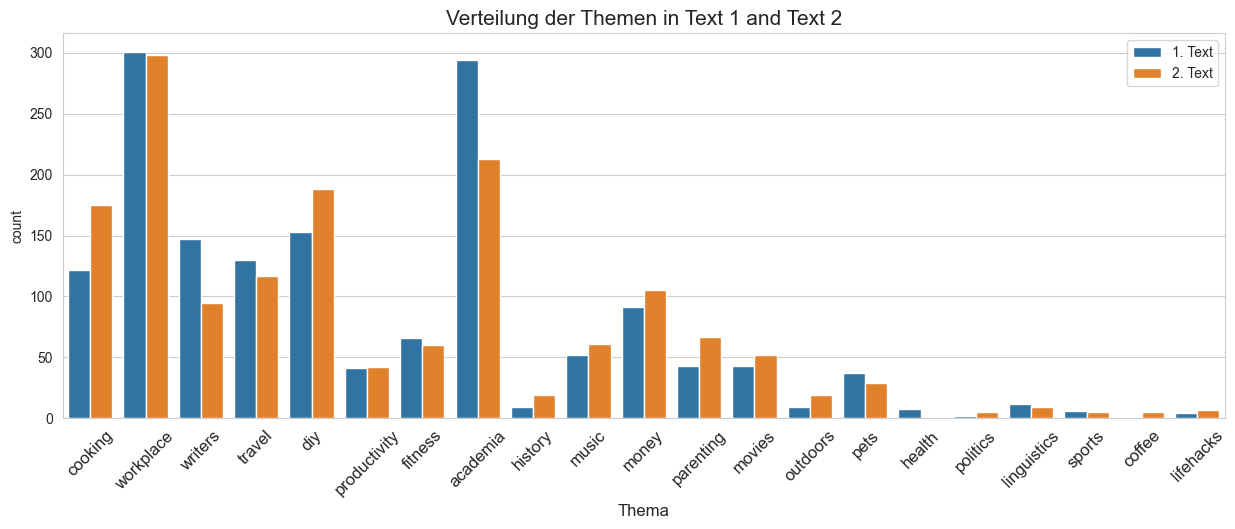

In [286]:
# Verteilung der Themen in Text 1 and Text 2
df_topics = pd.melt(df, value_vars=['topic_1', 'topic_2'], var_name='Topics', value_name='Category')
ax = plt.figure(figsize=(15, 5))
sns.countplot(data=df_topics, x='Category', hue='Topics')
plt.xticks(rotation=45, size=12)
plt.legend(labels=['1. Text', '2. Text'])
plt.title('Verteilung der Themen in Text 1 and Text 2', size=15)
plt.xlabel('Thema', size=12)
plt.show()

# Anmerkungen für das PDF
# hierbei ist anzumerken, dass die Themen nicht immer gleich sind, d.h es gibt auch Textpaare, die nicht das gleiche Thema haben

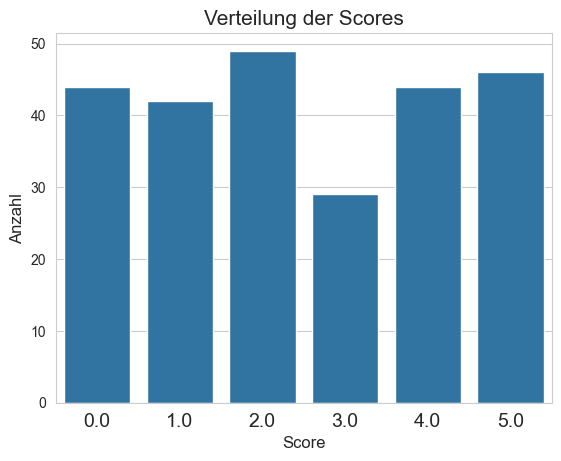

Anzahl Textpaare: 1571
Anzahl fehlender Scores: 1317
Anzahl Scores: 254
Anteil fehlender Scores: 83.83%
Anteil Scores: 16.17%


In [287]:
# Verteilung der Scores (Anzahl)
sns.countplot(data=df, x='score')
plt.xticks(size=14)
plt.title('Verteilung der Scores', size=15)
plt.xlabel('Score', size=12)
plt.ylabel('Anzahl', size=12)
plt.show()

# Anmerkungen für das PDF
missing_scores = df['score'].isna().sum()
print(f'Anzahl Textpaare: {len(df)}')
print(f'Anzahl fehlender Scores: {missing_scores}')
print(f'Anzahl Scores: {len(df) - missing_scores}')
print(f'Anteil fehlender Scores: {missing_scores / len(df) * 100:.2f}%')
print(f'Anteil Scores: {(len(df) - missing_scores) / len(df) * 100:.2f}%')

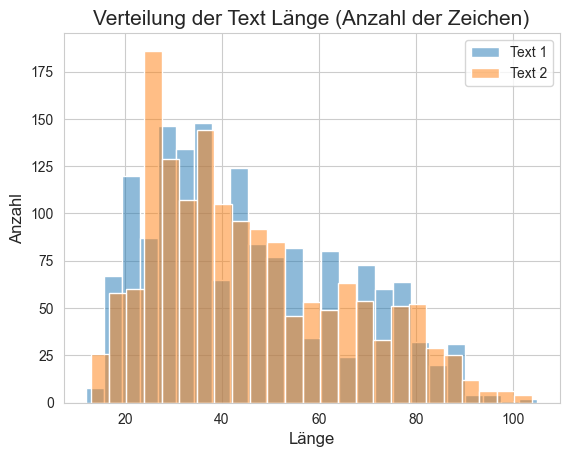

Durchschnittliche Textlänge Text 1: 45.39
Durchschnittliche Textlänge Text 2: 45.60
Median Textlänge Text 1: 42.00
Median Textlänge Text 2: 41.00


In [288]:
# Text Längen
df['text_1_length'] = df['text_string_1'].str.len()
df['text_2_length'] = df['text_string_2'].str.len()
sns.histplot(data=df, x='text_1_length', bins=25, alpha=0.5, label='Text 1')
sns.histplot(data=df, x='text_2_length', bins=25, alpha=0.5, label='Text 2')
plt.title('Verteilung der Text Länge (Anzahl der Zeichen)', size=15)
plt.xlabel('Länge', size=12)
plt.ylabel('Anzahl', size=12)
plt.legend()
plt.show()

# Anmerkungen für das PDF
print(f'Durchschnittliche Textlänge Text 1: {df["text_1_length"].mean():.2f}')
print(f'Durchschnittliche Textlänge Text 2: {df["text_2_length"].mean():.2f}')
print(f'Median Textlänge Text 1: {df["text_1_length"].median():.2f}')
print(f'Median Textlänge Text 2: {df["text_2_length"].median():.2f}')

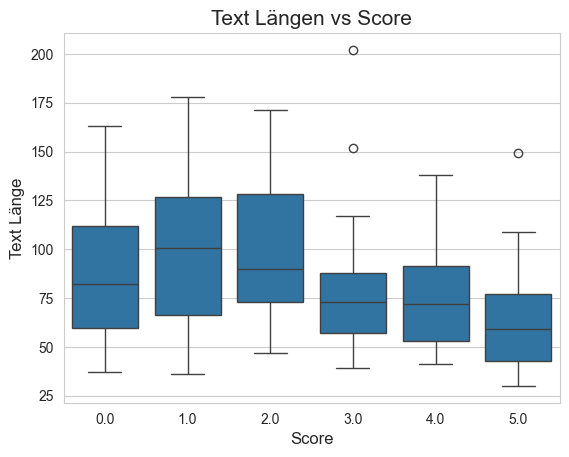

Korrelation zwischen Text Länge und Score: -0.31


In [289]:
# Text Längen vs Score
df_no_nan_scores = df.dropna(subset=['score'])
df_no_nan_scores = df_no_nan_scores.copy()
df_no_nan_scores['combined_text_length'] = df_no_nan_scores['text_1_length'] + df_no_nan_scores['text_2_length']
sns.boxplot(data=df_no_nan_scores, x='score', y='combined_text_length')
plt.title('Text Längen vs Score', size=15)
plt.xlabel('Score', size=12)
plt.ylabel('Text Länge', size=12)
plt.show()
print(f'Korrelation zwischen Text Länge und Score: {df_no_nan_scores["combined_text_length"].corr(df_no_nan_scores["score"]):.2f}')

In [291]:
df

,text_string_1,text_string_2,metadata_1,metadata_2,score,source_1_url,source_2_url,topic_1,topic_2,text_1_length,text_2_length
0,Tasting it is the only reliable way.,The way you have it is fine.,StackExchange Network: http://cooking.stackexc...,StackExchange Network: http://writers.stackexc...,NaN,http://cooking.stackexchange.com/questions/5611,http://writers.stackexchange.com/questions/11017,cooking,writers,36,28
1,I think it probably depends on your money.,It depends on your country.,StackExchange Network: http://workplace.stacke...,StackExchange Network: http://travel.stackexch...,NaN,http://workplace.stackexchange.com/questions/1755,http://travel.stackexchange.com/questions/45030,workplace,travel,42,27
2,You need to read a lot to know what you like a...,You don't have to know.,StackExchange Network: http://writers.stackexc...,StackExchange Network: http://academia.stackex...,NaN,http://writers.stackexchange.com/questions/12166,http://academia.stackexchange.com/questions/26241,writers,academia,64,23
3,"Obviously, the best book for you depends a lot...",The answer will depend of course on what you'r...,StackExchange Network: http://travel.stackexch...,StackExchange Network: http://travel.stackexch...,NaN,http://travel.stackexchange.com/questions/4582,http://travel.stackexchange.com/questions/23436,travel,travel,75,74
4,I've had this same problem.,I had the same problem as you.,StackExchange Network: http://diy.stackexchang...,StackExchange Network: http://cooking.stackexc...,NaN,http://diy.stackexchange.com/questions/2138,http://cooking.stackexchange.com/questions/12500,diy,cooking,27,30
...,...,...,...,...,...,...,...,...,...,...,...
1566,You are on the right path.,You are right about the overtaking rules.,StackExchange Network: http://money.stackexcha...,StackExchange Network: http://travel.stackexch...,NaN,http://money.stackexchange.com/questions/22386,http://travel.stackexchange.com/questions/13783,money,travel,26,41
1567,This is a terrible idea.,This is a bad idea.,StackExchange Network: http://fitness.stackexc...,StackExchange Network: http://cooking.stackexc...,5.0,http://fitness.stackexchange.com/questions/23636,http://cooking.stackexchange.com/questions/42032,fitness,cooking,24,19
1568,I have the same thing.,I have had the same issue last couple of years.,StackExchange Network: http://diy.stackexchang...,StackExchange Network: http://pets.stackexchan...,NaN,http://diy.stackexchange.com/questions/19977,http://pets.stackexchange.com/questions/208,diy,pets,22,47
1569,I don't think it makes any tremendous difference.,I don't think that there's any.,StackExchange Network: http://cooking.stackexc...,StackExchange Network: http://academia.stackex...,NaN,http://cooking.stackexchange.com/questions/9442,http://academia.stackexchange.com/questions/27341,cooking,academia,49,31


In [300]:
# create a new df with all sentences
df_sentences = pd.DataFrame(columns=['sentence'])
df_sentences['sentence'] = pd.concat([df['text_string_1'], df['text_string_2']]).reset_index(drop=True)
df_sentences['sentence'].value_counts()

# Anmerkungen für das PDF
print(f'Anzahl der Sätze: {len(df_sentences)}')
print(f'Anzahl der einzigartigen Sätze: {len(df_sentences["sentence"].unique())}')
print(f'Anzahl der doppelten Sätze: {len(df_sentences) - len(df_sentences["sentence"].unique())}')
print()
# Die drei meist vorkommenden Sätze
print(df_sentences['sentence'].value_counts()[:3])

Anzahl der Sätze: 3142
Anzahl der einzigartigen Sätze: 1607
Anzahl der doppelten Sätze: 1535

sentence
You need to read a lot to know what you like and what you don't.        39
It depends on what you want to do next, and where you want to do it.    38
You don't have to know.                                                 37
Name: count, dtype: int64
